**Project Goal**

Create a clean, analysis-ready dataset from raw files and build a dashboard to answer business questions like total sales, top products, monthly trends, etc.

importing dependencies for this project

**ETL Process Breakdown**

Step 1: Extract

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sales = pd.read_csv(r"C:\Users\Lenovo\Desktop\ETL\sales.csv")
products = pd.read_csv(r"C:\Users\Lenovo\Desktop\ETL\products.csv")
stores = pd.read_csv(r"C:\Users\Lenovo\Desktop\ETL\stores.csv")

In [8]:
sales

,sale_id,date,product_id,store_id,quantity,unit_price
0,1,2023-02-21,108,4,6,19.59
1,2,2023-01-15,108,2,5,22.60
2,3,2023-03-13,107,4,4,33.73
3,4,2023-03-02,103,4,3,33.98
4,5,2023-01-21,101,5,1,75.90
...,...,...,...,...,...,...
295,296,2023-02-02,110,1,1,28.33
296,297,2023-01-14,103,4,5,18.20
297,298,2023-01-21,107,1,9,23.83
298,299,2023-02-17,103,4,6,50.83


Step 2: Transform

walk thorugh with dataset checking the dtypes, infromation, null values if any , duplicate check

In [11]:
sales.shape

(300, 6)

In [12]:
sales.size

1800

In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sale_id     300 non-null    int64  
 1   date        300 non-null    object 
 2   product_id  300 non-null    int64  
 3   store_id    300 non-null    int64  
 4   quantity    300 non-null    int64  
 5   unit_price  300 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 14.2+ KB


In [14]:
sales.describe()

,sale_id,product_id,store_id,quantity,unit_price
count,300.000000,300.000000,300.0000,300.000000,300.000000
mean,150.500000,105.513333,2.9700,4.950000,55.364267
std,86.746758,2.975343,1.4524,2.583877,27.414417
min,1.000000,101.000000,1.0000,1.000000,10.020000
25%,75.750000,103.000000,2.0000,3.000000,31.297500
50%,150.500000,105.000000,3.0000,5.000000,56.730000
75%,225.250000,108.000000,4.0000,7.000000,79.390000
max,300.000000,110.000000,5.0000,9.000000,99.940000


In [15]:
sales.isnull().sum() #No null values found

sale_id       0
date          0
product_id    0
store_id      0
quantity      0
unit_price    0
dtype: int64

In [16]:
sales.duplicated().sum() #No duplicate in sales data

0

In [17]:
products.shape

(10, 3)

In [18]:
products.size

30

In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    10 non-null     int64 
 1   product_name  10 non-null     object
 2   category      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [20]:
products.describe()

,product_id
count,10.00000
mean,105.50000
std,3.02765
min,101.00000
25%,103.25000
50%,105.50000
75%,107.75000
max,110.00000


In [21]:
products.isnull().sum()  # No null values in products 

product_id      0
product_name    0
category        0
dtype: int64

In [22]:
products.duplicated().sum() #No duplicate values in product data

0

In [23]:
stores.shape

(5, 3)

In [24]:
stores.size

15

In [25]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_id    5 non-null      int64 
 1   store_name  5 non-null      object
 2   location    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


**Convert date columns to datetime**

In [27]:
sales

,sale_id,date,product_id,store_id,quantity,unit_price
0,1,2023-02-21,108,4,6,19.59
1,2,2023-01-15,108,2,5,22.60
2,3,2023-03-13,107,4,4,33.73
3,4,2023-03-02,103,4,3,33.98
4,5,2023-01-21,101,5,1,75.90
...,...,...,...,...,...,...
295,296,2023-02-02,110,1,1,28.33
296,297,2023-01-14,103,4,5,18.20
297,298,2023-01-21,107,1,9,23.83
298,299,2023-02-17,103,4,6,50.83


In [28]:
sales.dtypes

sale_id         int64
date           object
product_id      int64
store_id        int64
quantity        int64
unit_price    float64
dtype: object

In [29]:
sales['date'] = pd.to_datetime(sales['date'])

In [30]:
sales.dtypes

sale_id                int64
date          datetime64[ns]
product_id             int64
store_id               int64
quantity               int64
unit_price           float64
dtype: object

**Merge dataframes on keys (e.g., product_id, store_id)**

In [32]:
df = sales.merge(products, on='product_id').merge(stores, on='store_id')

In [33]:
df

,sale_id,date,product_id,store_id,quantity,unit_price,product_name,category,store_name,location
0,1,2023-02-21,108,4,6,19.59,Product_108,Toys,Store_4,Houston
1,2,2023-01-15,108,2,5,22.60,Product_108,Toys,Store_2,New York
2,3,2023-03-13,107,4,4,33.73,Product_107,Toys,Store_4,Houston
3,4,2023-03-02,103,4,3,33.98,Product_103,Electronics,Store_4,Houston
4,5,2023-01-21,101,5,1,75.90,Product_101,Home,Store_5,Houston
...,...,...,...,...,...,...,...,...,...,...
295,296,2023-02-02,110,1,1,28.33,Product_110,Home,Store_1,Houston
296,297,2023-01-14,103,4,5,18.20,Product_103,Electronics,Store_4,Houston
297,298,2023-01-21,107,1,9,23.83,Product_107,Toys,Store_1,Houston
298,299,2023-02-17,103,4,6,50.83,Product_103,Electronics,Store_4,Houston


**Adding a column called total price**

In [35]:
df['total_price'] = df['quantity'] * df['unit_price']

In [36]:
df

,sale_id,date,product_id,store_id,quantity,unit_price,product_name,category,store_name,location,total_price
0,1,2023-02-21,108,4,6,19.59,Product_108,Toys,Store_4,Houston,117.54
1,2,2023-01-15,108,2,5,22.60,Product_108,Toys,Store_2,New York,113.00
2,3,2023-03-13,107,4,4,33.73,Product_107,Toys,Store_4,Houston,134.92
3,4,2023-03-02,103,4,3,33.98,Product_103,Electronics,Store_4,Houston,101.94
4,5,2023-01-21,101,5,1,75.90,Product_101,Home,Store_5,Houston,75.90
...,...,...,...,...,...,...,...,...,...,...,...
295,296,2023-02-02,110,1,1,28.33,Product_110,Home,Store_1,Houston,28.33
296,297,2023-01-14,103,4,5,18.20,Product_103,Electronics,Store_4,Houston,91.00
297,298,2023-01-21,107,1,9,23.83,Product_107,Toys,Store_1,Houston,214.47
298,299,2023-02-17,103,4,6,50.83,Product_103,Electronics,Store_4,Houston,304.98


**Step 3: Load**

In [38]:
df.to_csv('cleaned_sales_date.csv',index=False)

**Exploratory Data Analysis  (EDA)**

What’s the best-selling product?

In [41]:
best_selling_product = df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).reset_index()

In [42]:
best_selling_product

,product_id,quantity
0,110,197
1,107,178
2,103,175
3,105,175
4,101,163
5,106,131
6,104,124
7,108,123
8,109,111
9,102,108


Which month had the highest revenue?

In [44]:
df['months'] = df['date'].dt.month

In [45]:
highest_revenue_by_month = df.groupby('months')['total_price'].sum().sort_values(ascending=False).reset_index()

In [46]:
highest_revenue_by_month

,months,total_price
0,3,28793.5
1,1,25740.0
2,2,25688.7


Which store performs the best?

In [48]:
best_store = df.groupby('store_name')['total_price'].sum().sort_values(ascending=False).reset_index()

In [49]:
best_store

,store_name,total_price
0,Store_1,18438.22
1,Store_5,18120.47
2,Store_4,16349.96
3,Store_2,15222.70
4,Store_3,12090.85


Average order value?

In [51]:
avg_order_value = round(df['total_price'].mean(),2)

In [52]:
avg_order_value

267.41

**Key Findings**


🥇 Best-Selling Product (by quantity sold):
Product_110 with 197 units sold.

📅 Month with Highest Revenue:
March 2023 with a total revenue of ₹28,793.50.

🏪 Top Performing Store (by total revenue):
Store_1 with ₹18,438.22 in sales.

💵 Average Order Value (AOV):
₹267.41 per order.

**Creating visualization charts**

<Axes: xlabel='quantity', ylabel='product_id'>

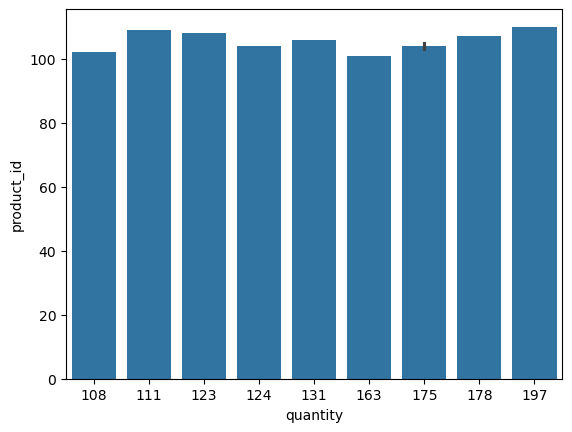

In [55]:
sns.barplot(best_selling_product, x='quantity', y='product_id')

<Axes: xlabel='months', ylabel='total_price'>

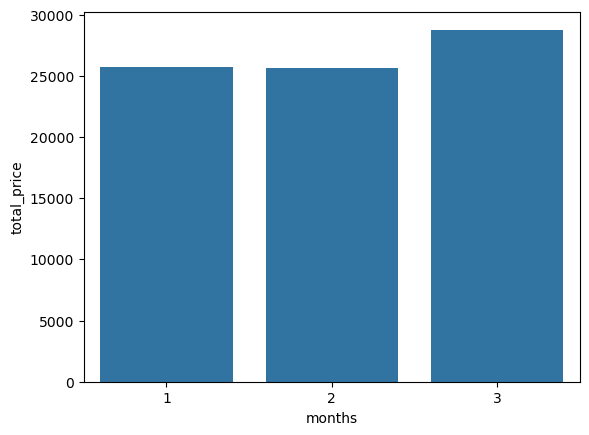

In [100]:
sns.barplot(highest_revenue_by_month, x='months',y='total_price')

<Axes: xlabel='store_name', ylabel='total_price'>

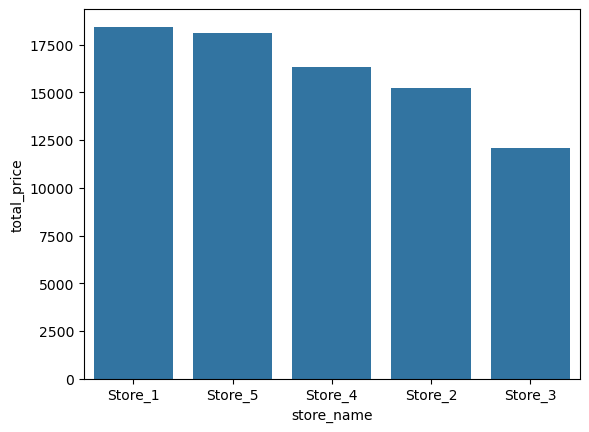

In [57]:
sns.barplot(best_store,x='store_name',y='total_price')